D (kmol/h) = 50.0
W (kmol/h) = 50.0
N_theoretical = 6.069199852221936
N_ceiling = 7
Feed tray number from top = 3
Trays above feed = 2


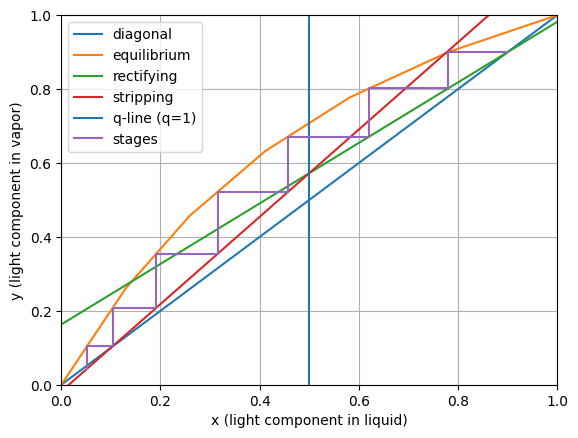

In [1]:
# notebooks/26.4_1
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, "..")

from bank.Distillation.distillation_mccabe_thiele_xy_base import (
    XYEquilibrium,
    McCabeThieleXYSpec,
    solve_mccabe_thiele_xy,
)

# -----------------------------
# Problem inputs
# -----------------------------
F  = 100.0   # kmol/h
zF = 0.50
xD = 0.90
xW = 0.10
R  = 4.52
q  = 1.0     # saturated liquid

# Tabulated equilibrium data for light component (benzene)
x_eq = [1.000, 0.780, 0.581, 0.411, 0.258, 0.130, 0.000]
y_eq = [1.000, 0.900, 0.777, 0.632, 0.456, 0.261, 0.000]

eq = XYEquilibrium(x=x_eq, y=y_eq)

out = solve_mccabe_thiele_xy(
    McCabeThieleXYSpec(
        eq=eq,
        F=F,
        zF=zF,
        x_D=xD,
        x_W=xW,
        R=R,
        q=q,
        max_stages=800,
    )
)

print("D (kmol/h) =", out["flows"]["D"])
print("W (kmol/h) =", out["flows"]["W"])
print("N_theoretical =", out["stages"]["N_theoretical"])
print("N_ceiling =", out["stages"]["N_ceiling"])
print("Feed tray number from top =", out["feed"]["feed_tray_from_top"])
print("Trays above feed =", out["feed"]["N_rect"])

# -----------------------------
# Optional plot
# -----------------------------
mR = out["lines"]["rectifying"]["slope"]
bR = out["lines"]["rectifying"]["intercept"]
mS = out["lines"]["stripping"]["slope"]
bS = out["lines"]["stripping"]["intercept"]
mq = out["lines"]["q_line"]["slope"]
bq = out["lines"]["q_line"]["intercept"]

pts = np.array(out["stages"]["points_xy"], dtype=float)

xs = np.linspace(0, 1, 500)
yeq = np.array([eq.y_of_x(float(x)) for x in xs])

plt.figure()
plt.plot(xs, xs, label="diagonal")
plt.plot(xs, yeq, label="equilibrium")
plt.plot(xs, mR * xs + bR, label="rectifying")
plt.plot(xs, mS * xs + bS, label="stripping")
if np.isfinite(mq):
    plt.plot(xs, mq * xs + bq, label="q-line")
else:
    plt.axvline(x=bq, label="q-line (q=1)")
plt.plot(pts[:, 0], pts[:, 1], linewidth=1.5, label="stages")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.xlabel("x (light component in liquid)")
plt.ylabel("y (light component in vapor)")
plt.legend()
plt.show()